In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
df.shape

(395, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [6]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [8]:
#Label encoding

X=df.drop(['address','famsize','Medu','Fedu','passed'],axis=1)
y=df['passed']
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
label_encoders = {}
ordinal_features= ['school','sex','Pstatus',
                  'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']   

for i in ordinal_features:
    label_encoders[i] = LabelEncoder()
    X[i] = label_encoders[i].fit_transform(X[i]) 
X.head()

,school,sex,age,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,at_home,teacher,course,mother,2,2,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,at_home,other,course,father,1,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,at_home,other,other,mother,1,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,health,services,home,mother,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,other,other,home,father,1,2,...,1,0,0,4,3,2,1,2,5,4


In [9]:
X.shape

(395, 26)

In [10]:
#onehot encoding

X=pd.get_dummies(X)
X.head()

,school,sex,age,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,2,2,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,1,2,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,2,3,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,1,3,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,1,2,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0


In [11]:
results_arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[],'Failure%':[],'Time_Taken':[]}

In [12]:
#Logistic Rregression model

In [13]:
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time = time.time()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

end_time = time.time()

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Logistic Regression = ',time_taken, ' seconds')

Accuracy is 0.7341772151898734
precision is 0.746031746031746
recall is 0.9038461538461539
f1_score is 0.8173913043478261
[[11 16]
 [ 5 47]]
% of students failing after intervention =  6.329113924050633
Time taken for Logistic Regression =  0.07099080085754395  seconds


C:\Users\vaisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#KNN

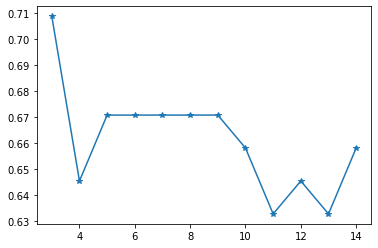

In [15]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
start_time = time.time()
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'*-')

In [16]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
end_time = time.time()
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for KNN = ',time_taken, ' seconds')

Accuracy is 0.6329113924050633
precision is 0.6533333333333333
recall is 0.9423076923076923
f1_score is 0.7716535433070866
[[ 1 26]
 [ 3 49]]
% of students failing after intervention =  3.79746835443038
Time taken for KNN =  11.038692474365234  seconds


In [17]:
#Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
end_time = time.time()
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Decision Tree = ',time_taken, ' seconds')

Accuracy is 0.6329113924050633
precision is 0.7017543859649122
recall is 0.7692307692307693
f1_score is 0.7339449541284404
[[10 17]
 [12 40]]
% of students failing after intervention =  15.18987341772152
Time taken for Decision Tree =  0.014987945556640625  seconds


In [19]:
#Support Vector Machine Algorithm

In [20]:
from sklearn.svm import SVC
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for SVM = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.71875
recall is 0.8846153846153846
f1_score is 0.7931034482758621
[[ 9 18]
 [ 6 46]]
% of students failing after intervention =  7.59493670886076
Time taken for SVM =  0.07096624374389648  seconds


In [21]:
#Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
end_time = time.time()
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)
results_arr['Failure%'].append(fail_percent)
results_arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Random Forest = ',time_taken, ' seconds')

Accuracy is 0.6835443037974683
precision is 0.6901408450704225
recall is 0.9423076923076923
f1_score is 0.7967479674796748
[[ 5 22]
 [ 3 49]]
% of students failing after intervention =  3.79746835443038
Time taken for Random Forest =  0.14391589164733887  seconds


In [23]:
print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format('Item', 'LR', 'KNN','DT', 'SVM','RF'))
print('-'*80) 
# print each data item.
for key, value in results_arr.items():
    a1, a2, a3, a4, a5 = value
    a1 = np.round(a1,3)
    a2 = np.round(a2,3)
    a3 = np.round(a3,3)
    a4 = np.round(a4,3)
    a5 = np.round(a5,3)
    print ("{:<12} | {:<12} | {:<12} | {:<12} | {:<12} | {:<12}".format(key, a1, a2, a3, a4, a5))

Item         | LR           | KNN          | DT           | SVM          | RF          
--------------------------------------------------------------------------------
Accuracy     | 0.734        | 0.633        | 0.633        | 0.696        | 0.684       
Precision    | 0.746        | 0.653        | 0.702        | 0.719        | 0.69        
Recall       | 0.904        | 0.942        | 0.769        | 0.885        | 0.942       
F1_Score     | 0.817        | 0.772        | 0.734        | 0.793        | 0.797       
Failure%     | 6.329        | 3.797        | 15.19        | 7.595        | 3.797       
Time_Taken   | 0.071        | 11.039       | 0.015        | 0.071        | 0.144       


In [24]:
#KNN has least computation 
#highest f1 score is obtainted from Rf classifier